In [9]:
!pip install pyforest
from pyforest import *
import warnings
warnings.filterwarnings("ignore")

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=b625cba5f220ff94353fd0842fb689cb4077af3f5e26c6f54459f115a1542d22
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [10]:
lazy_imports()

['import torch',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.model_selection import train_test_split',
 'import dash',
 'from pyspark import SparkContext',
 'import fastai',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.preprocessing import RobustScaler',
 'import awswrangler as wr',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import plotly.graph_objs as go',
 'import altair as alt',
 'import matplotlib.pyplot as plt',
 'import plotly.express as px',
 'from sklearn.cluster import KMeans',
 'import bokeh',
 'from sklearn.ensemble import RandomForestClassifier',
 'from scipy import stats',
 'import gensim',
 'import numpy as np',
 'import pandas as pd',
 'import plotly as py',
 'from sklearn.linear_model import LogisticRegression',
 'from PIL import Image',
 'from sklearn.model_selection import KFold',
 'import textblob',
 'from dask import dataframe as dd',
 'from sklearn.model_se

In [11]:
df_train=pd.read_csv('/content/bigmart_train.csv')
df_test=pd.read_csv('/content/bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [14]:
print("Shape of the Training Data:",df_train.shape)
print("Shape of the Testing Data :",df_test.shape)

Shape of the Training Data: (8523, 12)
Shape of the Testing Data : (5681, 11)


In [15]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [17]:
df=df_train.copy()

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
cor=df.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

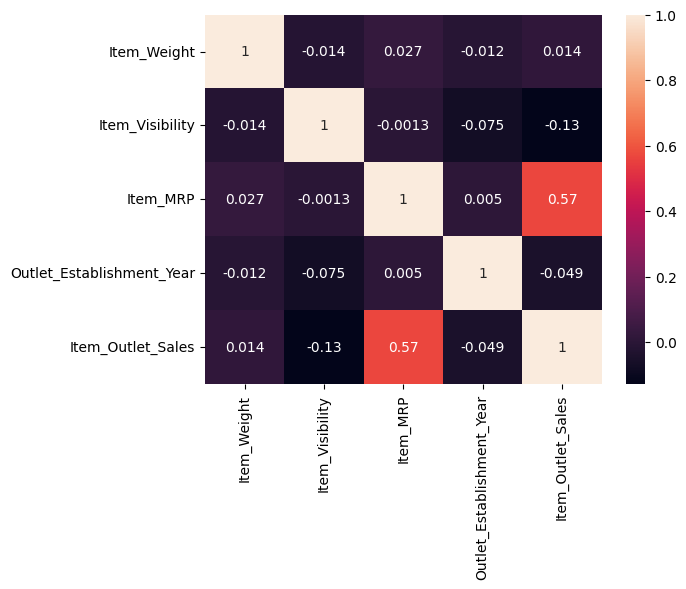

In [20]:
sns.heatmap(cor,annot=True)
plt.show()

## There is no correlations between the attributes(zero correlations).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

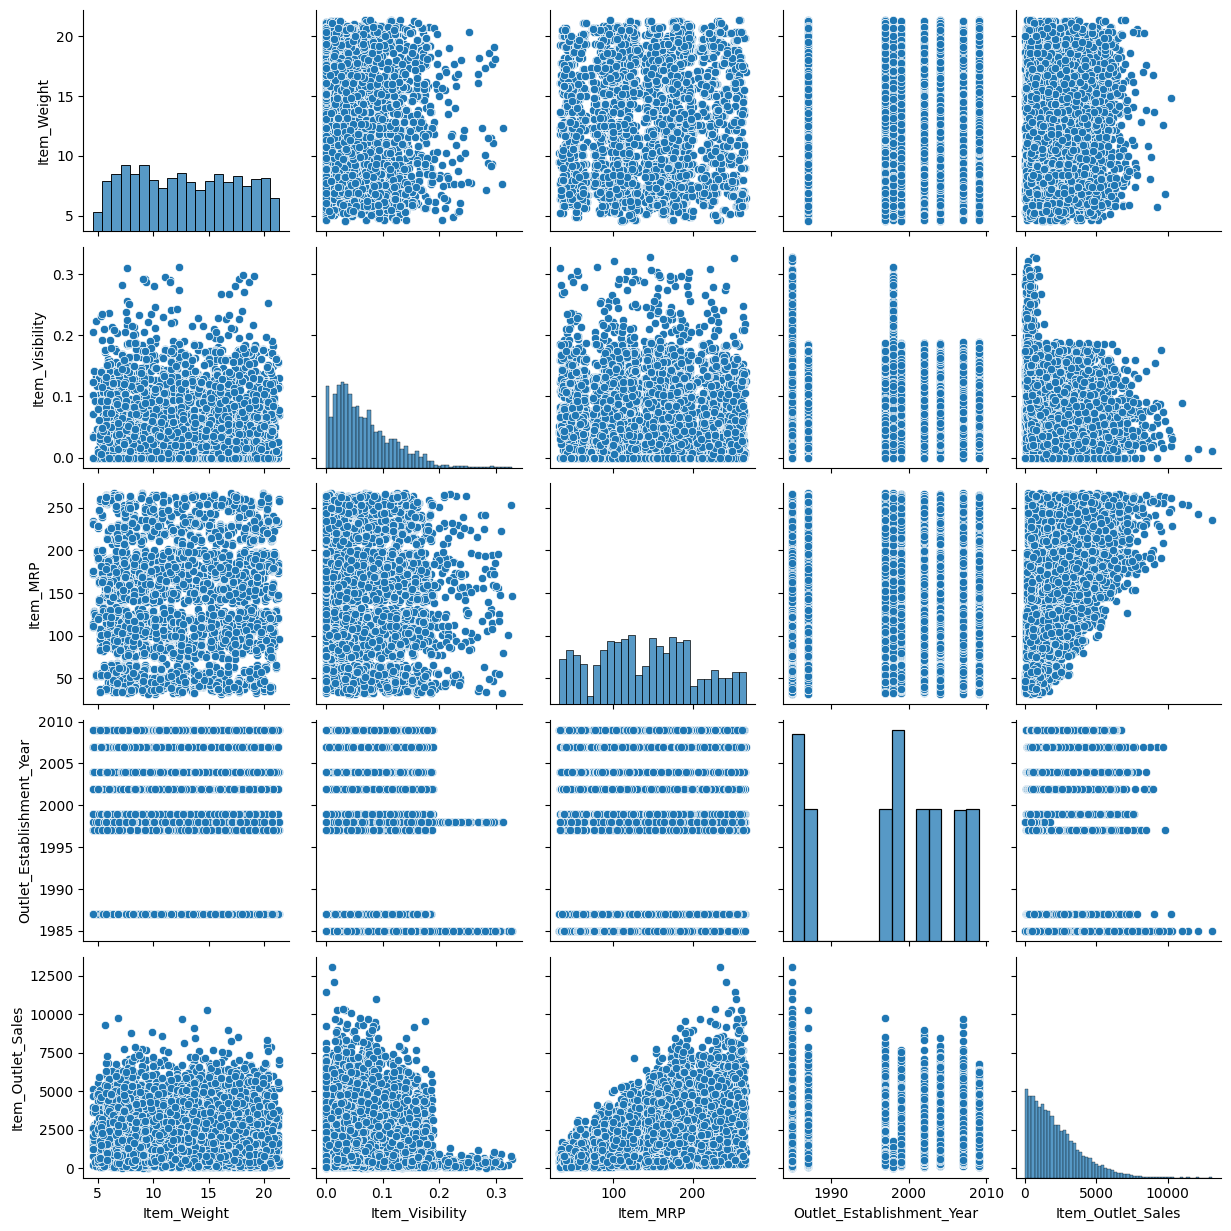

In [21]:
sns.pairplot(df)
plt.show()

<h5> Where the item weight is uniformly distributed,item visibility is rightly skewed </h5>

In [22]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [24]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [25]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [26]:
# Handling the missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(),axis=0,inplace=True)
df['Outlet_Size'].fillna('Medium',axis=0,inplace=True)

In [27]:
df.isnull().sum().sum()

0

In [28]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

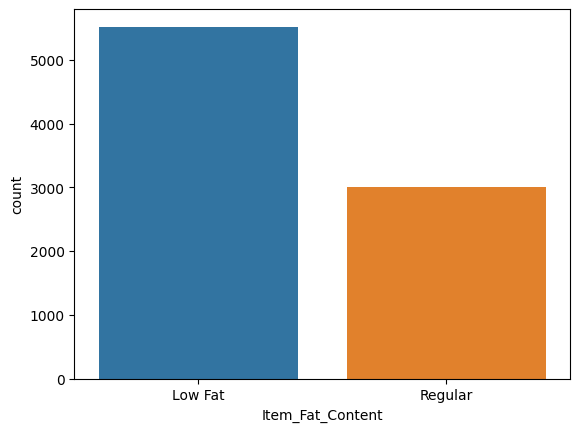

In [30]:
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

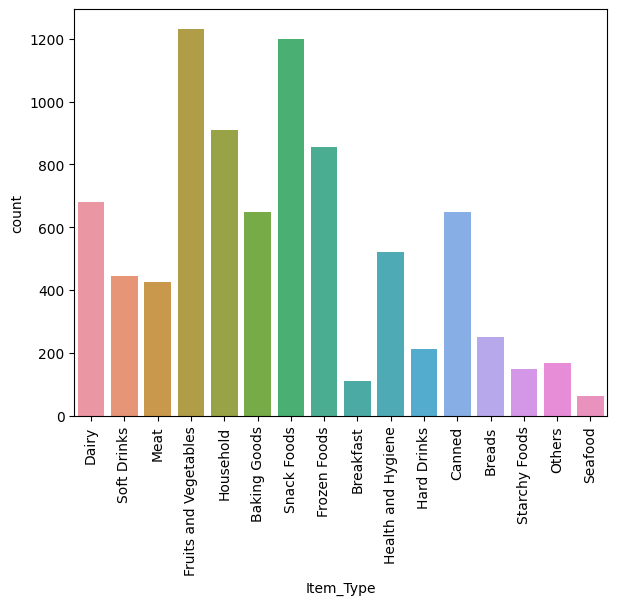

In [31]:
sns.countplot(x='Item_Type',data=df)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

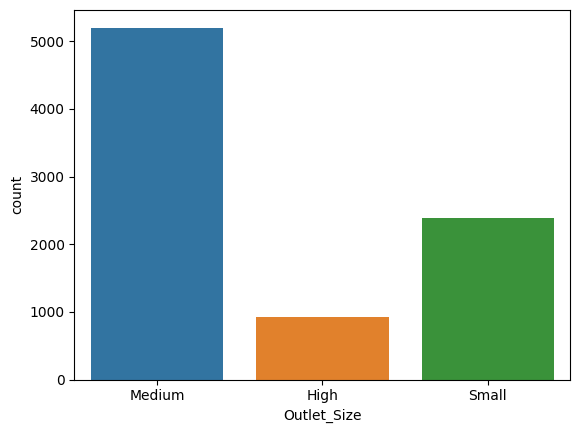

In [32]:
sns.countplot(x='Outlet_Size',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

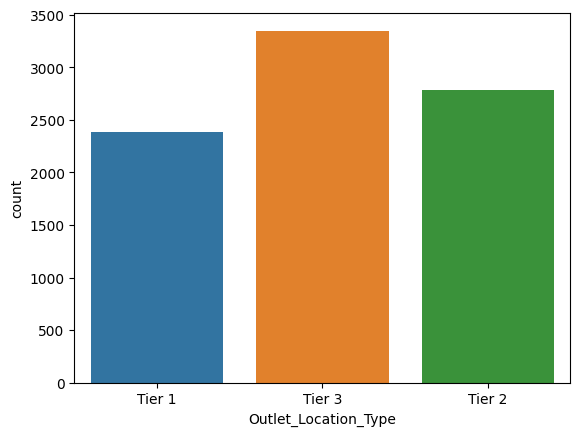

In [33]:
sns.countplot(x='Outlet_Location_Type',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

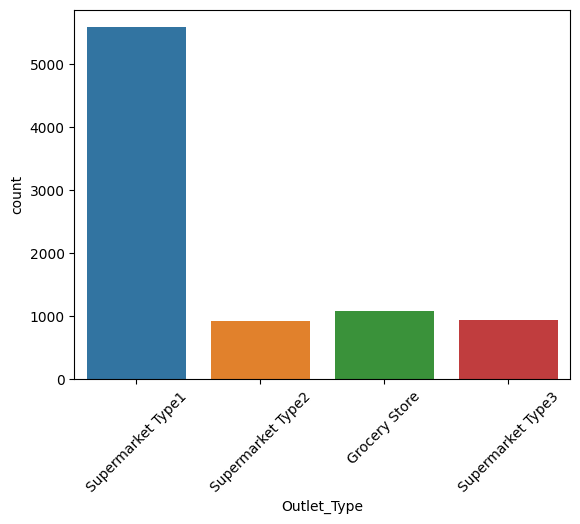

In [34]:
sns.countplot(x='Outlet_Type',data=df)
plt.xticks(rotation=45)
plt.show()

In [35]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for cat in cat_col:
  df[cat]=label.fit_transform(df[cat])

In [36]:
df['Item_Outlet_Sales']=np.round(df['Item_Outlet_Sales'])

<IPython.core.display.Javascript object>

In [37]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.0
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.0
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.0
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,995.0


In [38]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [39]:
# spliting the data
x=df.drop('Item_Outlet_Sales',axis=1)
y=np.array(df['Item_Outlet_Sales']).reshape(-1,1)
scale=StandardScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
y_scaled=scale.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
#model Building
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred=model.predict(x_test)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.5037613014822513
0.5240532209828945


In [61]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500,max_depth=9)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=500)

In [62]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.6851424220584802
0.6041705422503238


In [108]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=100,learning_rate=0.1)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [109]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.7182654021320831
0.5896858787754933
